In [1]:
from keras.datasets import mnist
from keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Input,AveragePooling2D,Reshape,Activation,Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.utils import plot_model, to_categorical

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#数据变成TensorFow为Backend的形式
print (x_train.shape)
print (x_test.shape)
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#把标签变成one-hot编码的形式
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# 构建LeNet-5网络
lenet = Sequential()
lenet.add(Conv2D(input_shape = (28,28,1), filters=6, kernel_size=(5,5), padding='valid', activation='relu'))
lenet.add(MaxPool2D(pool_size=(2,2), strides=2))
lenet.add(Conv2D(input_shape=(16,16,8), filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
lenet.add(MaxPool2D(pool_size=(2,2), strides=2))
lenet.add(Flatten())
lenet.add(Dense(120, activation='relu'))
lenet.add(Dense(84, activation='relu'))
lenet.add(Dense(10, activation='softmax'))
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [4]:
lenet.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
lenet_history = lenet.fit(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 1.1482 - acc: 0.8318
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1317 - acc: 0.9598
Epoch 3/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0980 - acc: 0.9701
Epoch 4/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.0807 - acc: 0.9753
Epoch 5/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.0703 - acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0626 - acc: 0.9807
Epoch 7/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0547 - acc: 0.9825
Epoch 8/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0486 - acc: 0.9848
Epoch 9/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.0445 - acc: 0.9868
Epoch 10/20
60000/60000 [==============================] - 12s 203us/step - loss: 

In [5]:
lenet_score=lenet.evaluate(x_test,y_test)
print("Testing Loss:", lenet_score[0])
print("Testing Accuracy of:", lenet_score[1])

10000/10000 [==============================] - 1s 126us/step
Testing Loss: 0.06592238205773292
Testing Accuracy of: 0.9826


In [6]:
# 构建LeNet-5网络
lenet_drop = Sequential()
lenet_drop.add(Conv2D(input_shape = (28,28,1), filters=6, kernel_size=(5,5), padding='valid', activation='relu'))
lenet_drop.add(MaxPool2D(pool_size=(2,2), strides=2))
lenet_drop.add(Conv2D(input_shape=(16,16,8), filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
lenet_drop.add(MaxPool2D(pool_size=(2,2), strides=2))
lenet_drop.add(Flatten())
lenet_drop.add(Dense(120, activation='relu'))
lenet_drop.add(Dropout(0.2))
lenet_drop.add(Dense(84, activation='relu'))
lenet_drop.add(Dropout(0.2))
lenet_drop.add(Dense(10, activation='softmax'))
lenet_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               30840     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
__________

In [7]:
lenet_drop.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
lenet_drop_history = lenet_drop.fit(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 14.4106 - acc: 0.1054
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 1.6244 - acc: 0.6266
Epoch 3/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.3582 - acc: 0.8957
Epoch 4/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.2443 - acc: 0.9284
Epoch 5/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1958 - acc: 0.9431
Epoch 6/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1689 - acc: 0.9507
Epoch 7/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1504 - acc: 0.9555
Epoch 8/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.1354 - acc: 0.9602
Epoch 9/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.1239 - acc: 0.9634
Epoch 10/20
60000/60000 [==============================] - 11s 182us/step - loss:

In [8]:
lenet_drop_score=lenet_drop.evaluate(x_test,y_test)
print("Testing Loss:", lenet_drop_score[0])
print("Testing Accuracy of:", lenet_drop_score[1])

10000/10000 [==============================] - 1s 131us/step
Testing Loss: 0.05491561537194575
Testing Accuracy of: 0.9841


dict_keys(['loss', 'acc'])


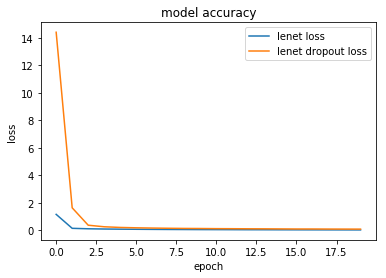

In [9]:
print(lenet_history.history.keys())
# summarize history for accuracy
plt.plot(lenet_history.history['loss'])
plt.plot(lenet_drop_history.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['lenet loss','lenet dropout loss'], loc='upper right')
plt.show()